In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [7]:
df=pd.read_csv("train.csv")
df1=pd.read_csv("test.csv")

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


In [9]:
df1.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,332.00,418.00,418.00,417.00
mean,1100.50,2.27,30.27,0.45,0.39,35.63
std,120.81,0.84,14.18,0.90,0.98,55.91
min,892.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,1.00,21.00,0.00,0.00,7.90
50%,1100.50,3.00,27.00,0.00,0.00,14.45
75%,1204.75,3.00,39.00,1.00,0.00,31.50
max,1309.00,3.00,76.00,8.00,9.00,512.33


In [10]:
df1["Cabin"].isnull().sum()

327

In [11]:
df=df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
df1=df1.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [12]:
df.Sex=pd.get_dummies(df.Sex,drop_first=True) #To map Gender(Male,Female) into (1,0)
df1.Sex=pd.get_dummies(df1.Sex,drop_first=True)

In [13]:
df["Age"].isnull().sum()
df1["Age"].isnull().sum()

86

In [14]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,0.65,29.70,0.52,0.38,32.20
std,0.49,0.84,0.48,14.53,1.10,0.81,49.69
min,0.00,1.00,0.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,0.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,1.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,1.00,38.00,1.00,0.00,31.00
max,1.00,3.00,1.00,80.00,8.00,6.00,512.33


In [15]:
df["Age"].fillna(29,inplace=True) #Filling Null values with Mean
df1["Age"].fillna(29,inplace=True)

In [16]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
df.Embarked.fillna("S",inplace=True) #Filling Null values with most frequency occuring category

In [18]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
count=df.Sex.value_counts()
print(count)

1    577
0    314
Name: Sex, dtype: int64


In [20]:
male_survived=np.where(df.Sex==1,df.Survived,0)
female_survived=np.where(df.Sex==0,df.Survived,0)
male_survived=sum(male_survived)
female_survived=sum(female_survived)
#sum(df.Survived)

In [21]:
male_died=sum(df.Sex)-male_survived
female_died=len(df.Sex)-(male_survived+male_died)-female_survived

<BarContainer object of 2 artists>

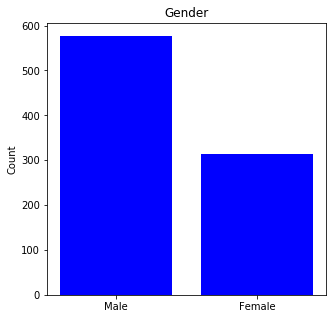

In [22]:
#gender=["Male","female"]
#values=[count[1],count[0]]
#fig = plt.figure(figsize = (5, 5)) 
#plt.bar(gender, values, color ='blue')
  
#plt.xlabel("Gender") 
#plt.ylabel("Number") 
#plt.title("Total Members") 
#plt.show() 

x=["Male","Female"]
fig = plt.figure(figsize = (5, 5)) 
plt.title("Gender")
plt.ylabel("Count")
plt.bar(x,df.Sex.value_counts(),color='blue')

<BarContainer object of 2 artists>

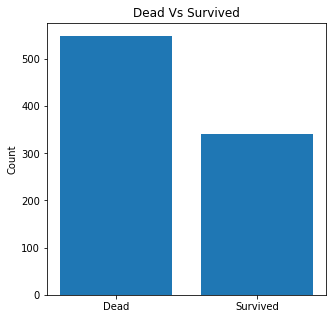

In [23]:
x=["Dead","Survived"]
fig = plt.figure(figsize = (5, 5)) 
plt.title("Dead Vs Survived")
plt.ylabel("Count")
plt.bar(x,df.Survived.value_counts())

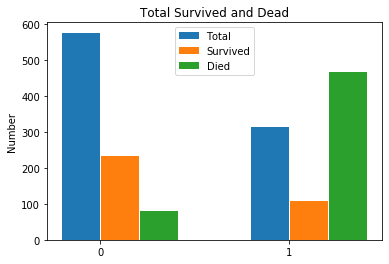

In [35]:
labels = sorted(df.Sex.unique())
survived= [female_survived,male_survived]
died= [female_died,male_died]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2,df.Sex.value_counts(), width, label='Total')
rects2 = ax.bar(x + width/1.9, survived, width, label='Survived')
rects3 = ax.bar(x + width/0.64, died, width, label='Died')


ax.set_ylabel('Number')
ax.set_title('Total Survived and Dead')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

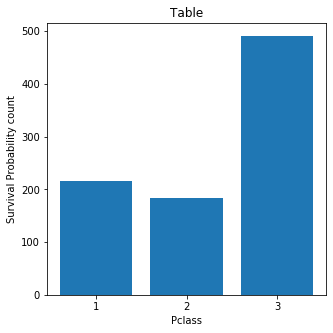

In [36]:
fig = plt.figure(figsize = (5, 5)) 
plt.xticks(df.Pclass.unique())
plt.bar(df.Pclass.unique(),df.Pclass.value_counts())
plt.xlabel('Pclass')
plt.ylabel('Survival Probability count')
plt.title("Table")
plt.show()

Text(0, 0.5, 'Survival Probability')

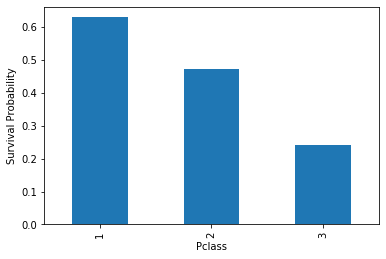

In [37]:
plt1 = df[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar')
plt1.set_xlabel('Pclass')
plt1.set_ylabel('Survival Probability')

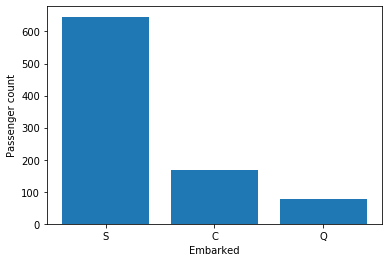

In [38]:
plt.bar(df.Embarked.unique(),df.Embarked.value_counts())
plt.xlabel('Embarked')
plt.ylabel('Passenger count')
plt.show()

Text(0, 0.5, 'Survival Probability')

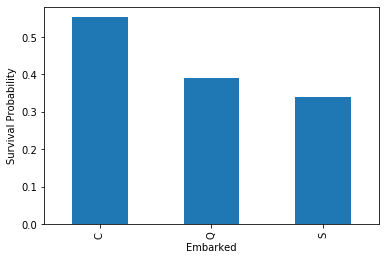

In [39]:
plt2 = df[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind='bar')
plt2.set_xlabel('Embarked')
plt2.set_ylabel('Survival Probability')

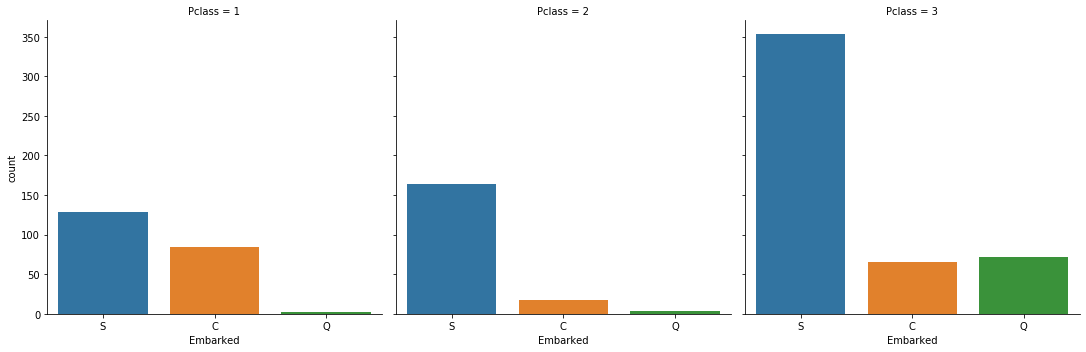

In [40]:
sns.catplot('Embarked', col = 'Pclass', data = df, kind = 'count')

([<matplotlib.axis.XTick at 0x1e9ffc52388>,
 <a list of 2 Text xticklabel objects>)

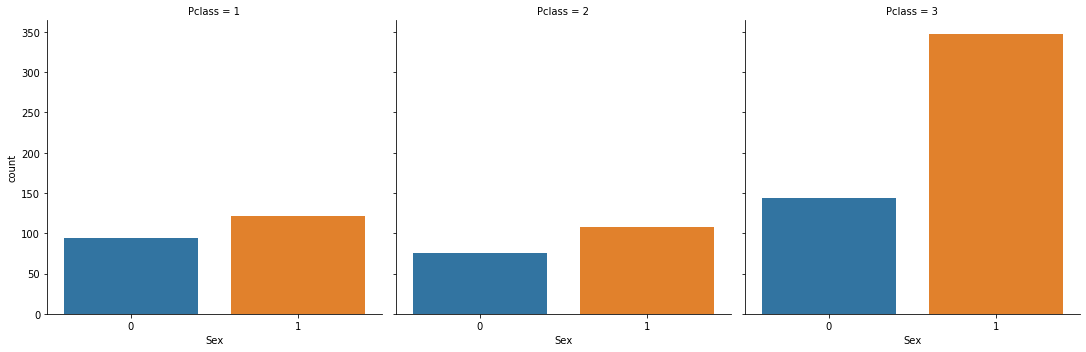

In [41]:
sns.catplot('Sex', col = 'Pclass', data = df, kind = 'count')
plt.xticks(x,labels)

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null uint8
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(1), uint8(1)
memory usage: 20.1+ KB


In [43]:
df.Fare=df.Fare.astype(int)
df1["Fare"].fillna(29,inplace=True)
df1.Fare=df1.Fare.astype(int)
df.Age=df.Age.astype(int)
df1.Age=df.Age.astype(int)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null uint8
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int32
Embarked    891 non-null object
dtypes: int32(2), int64(4), object(1), uint8(1)
memory usage: 42.8+ KB


In [45]:
df.Embarked=pd.get_dummies(df.Embarked,drop_first=True)
df1.Embarked=pd.get_dummies(df1.Embarked,drop_first=True)

In [46]:
df['Relatives']=df['SibSp']+df['Parch']
df['Fare_Per_Person'] = df['Fare']/(df['Relatives']+1)
df['Fare_Per_Person'] = df['Fare_Per_Person'].astype(int)
df1['Relatives']=df['SibSp']+df1['Parch']
df1['Relatives']=df1['Relatives'].astype(int)
df1['Fare_Per_Person'] = df1['Fare']/(df1['Relatives']+1)
df1['Fare_Per_Person'] = df1['Fare_Per_Person'].astype(int)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived           891 non-null int64
Pclass             891 non-null int64
Sex                891 non-null uint8
Age                891 non-null int32
SibSp              891 non-null int64
Parch              891 non-null int64
Fare               891 non-null int32
Embarked           891 non-null uint8
Relatives          891 non-null int64
Fare_Per_Person    891 non-null int32
dtypes: int32(3), int64(5), uint8(2)
memory usage: 47.1 KB


In [48]:
X_train=df.iloc[:,1:]
X_train
Y_train=df.Survived
X_test=df1.iloc[:]

In [49]:
random_forest = RandomForestClassifier(n_estimators=40)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2) 

In [50]:
reg = LogisticRegression(solver='lbfgs',max_iter=1000)
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
acc_log = round(reg.score(X_train, Y_train) * 100, 2)

In [51]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [52]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [53]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
linear_svc = LinearSVC(random_state=1,max_iter=10000)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [54]:
test=KNeighborsClassifier(n_neighbors=1)
test.fit(X_train,Y_train)
ypred=test.predict(X_test)
acc_Kneighbour=test.score(X_train, Y_train) * 100

<BarContainer object of 6 artists>

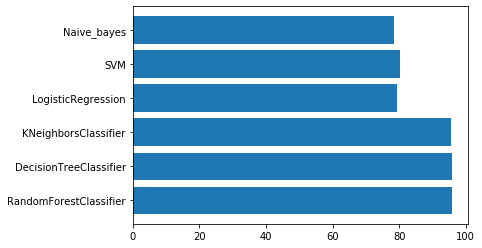

In [55]:
Model=["RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","LogisticRegression","SVM","Naive_bayes"]
Accuracy=[acc_random_forest,acc_decision_tree,acc_Kneighbour,acc_log,acc_linear_svc,acc_gaussian]
plt.barh(Model,Accuracy)

In [63]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_prediction)

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:02<00:00, 10.73it/s]


In [64]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.61,0.67,0.67,0.61,0.05
NearestCentroid,0.56,0.66,0.66,0.54,0.02
PassiveAggressiveClassifier,0.71,0.65,0.65,0.70,0.02
BernoulliNB,0.64,0.62,0.62,0.65,0.02
CalibratedClassifierCV,0.69,0.57,0.57,0.63,0.32
LogisticRegression,0.69,0.55,0.55,0.61,0.02
RidgeClassifierCV,0.69,0.55,0.55,0.61,0.04
RidgeClassifier,0.69,0.55,0.55,0.61,0.04
LinearDiscriminantAnalysis,0.69,0.55,0.55,0.61,0.04
